## SPRINT 8 - Visualizaciones en Python

Mailin Adriana Villan Villan <br>

Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

***


## Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

***


In [52]:
import sys
!{sys.executable} -m pip install --upgrade pip

import sys
!{sys.executable} -m pip install mysql-connector-python pandas seaborn matplotlib numpy ipywidgets squarify

In [53]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify


In [54]:
from mysql.connector import Error

try:
    conexion_bd = mysql.connector.connect(host='localhost',
                                         database='transactions',
                                         user='root',
                                         password='root')
    pd.set_option("display.max.columns", None) 
    
    if conexion_bd.is_connected():
        db_Info = conexion_bd.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = conexion_bd.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
        cursor = conexion_bd.cursor()
        cursor.execute("SHOW TABLES")
        MySQL_tables = [table[0] for table in cursor.fetchall()]  

except Error as e:
    print("Error while connecting to MySQL", e)

        
print("Tablas disponibles en la base de datos:", MySQL_tables)

# querys para visualizar los datos de las tablas cargadas
query = "SELECT * FROM companies;"
df = pd.read_sql(query, conexion_bd)
print(df.head())

query = "SELECT amount FROM transactions;"
df_ = pd.read_sql(query, conexion_bd)
print(df.head())

Connected to MySQL Server version  8.4.0
You're connected to database:  ('transactions',)
Tablas disponibles en la base de datos: ['companies', 'credit_cards', 'estat_targetes', 'products', 'transactions', 'transactions_products', 'transation_num_product', 'users']
  company_id                 company_name           phone  \
0     b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226     Magna A Neque Industries  04 14 44 64 62   
2     b-2230                  Fusce Corp.  08 14 97 58 85   
3     b-2234    Convallis In Incorporated  06 66 57 29 50   
4     b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0   

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\1266536585.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)
C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\1266536585.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ = pd.read_sql(query, conexion_bd)


** Ejercicio 1 <br>

** Una variable numérica.<br>

** Explicación del código:<br>
** Lo que me llama la atención de graficar esta variable es: <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\1668252411.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


Text(0.5, 1.0, 'Una variable numérica (amount)')

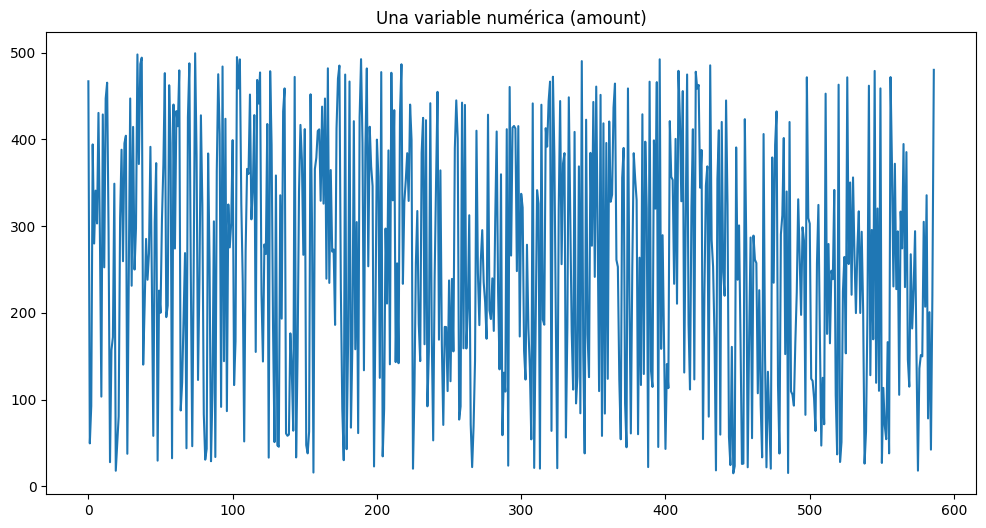

In [42]:
query = "SELECT * FROM transactions;"
df = pd.read_sql(query, conexion_bd)

plt.figure(figsize=(12,6))
df["amount"].plot()

plt.title("Una variable numérica (amount)")

** Ejercicio 2 <br>

** Dos variables numéricas.<br>



** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\3926567591.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


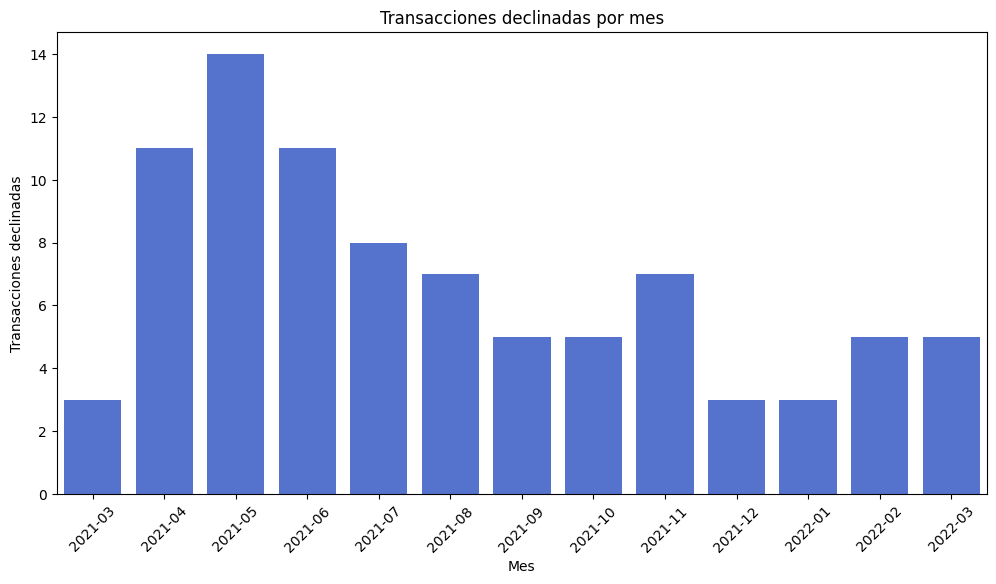

In [43]:
query = "SELECT * FROM transactions;"
df = pd.read_sql(query, conexion_bd)


df['timestamp'] = pd.to_datetime(df['timestamp']) #cambiar formato de fecha 
df['year_month'] = df['timestamp'].dt.to_period('M') #extraer año y mes
df_monthly = df.groupby('year_month')['declined'].sum().reset_index() # agrupo la suma del amount por mes 

df_monthly['year_month'] = df_monthly['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_monthly, x='year_month', y='declined', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Transacciones declinadas")
plt.title("Transacciones declinadas por mes")
plt.show()

** Ejercicio 3 <br>

** Una variable categórica.<br>





** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 

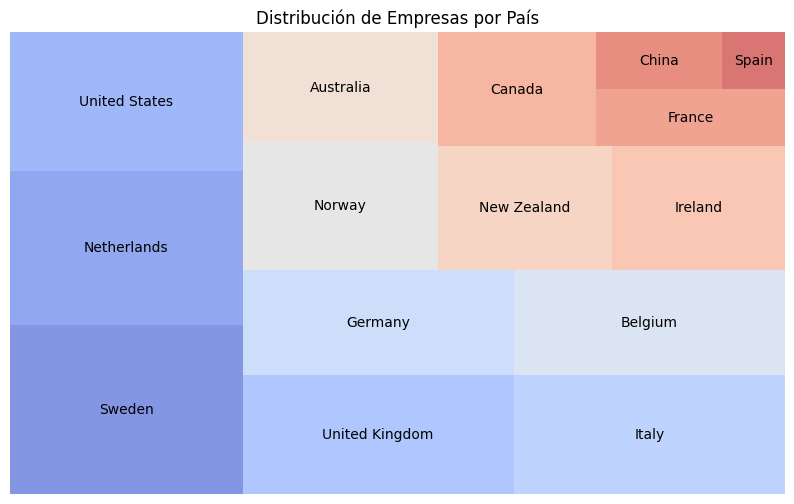

In [57]:
import squarify

# Obtener la cantidad de empresas por país
df_country = df['country'].value_counts().reset_index()
df_country.columns = ['country', 'count']

# Graficar Treemap
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=df_country['count'], 
    label=df_country['country'], 
    alpha=0.7, 
    color=sns.color_palette("coolwarm", len(df_country))
)
plt.title("Distribución de Empresas por País")
plt.axis("off")  # Ocultar ejes
plt.show()

In [ ]:
query = "SELECT * FROM companies;"
df = pd.read_sql(query, conexion_bd)

df_country = country[['company_id']].groupby('company_id').reset_index()

squarify.plot(cantidad_empresas=df_country, label=empresas)
plt.title('Average diamond price by cut')
plt.show()



C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\3710026081.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


NameError: name 'country' is not defined

** Ejercicio 4 <br>

** Una variable categórica y una numérica.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 

   id     name    surname           phone                              email  \
0   1     Zeus     Gamble  1-282-581-0551       interdum.enim@protonmail.edu   
1   2  Garrett  Mcconnell  (718) 257-2412  integer.vitae.nibh@protonmail.org   
2   3   Ciaran   Harrison  (522) 598-1365           interdum.feugiat@aol.org   
3   4   Howard   Stafford  1-411-740-3269          ornare.egestas@icloud.edu   
4   5    Hayfa     Pierce  1-554-541-2077     et.malesuada.fames@hotmail.org   

     birth_date        country        city postal_code                 address  
0  Nov 17, 1985  United States      Lowell       73544   348-7818 Sagittis St.  
1  Aug 23, 1992  United States  Des Moines       59464             903 Sit Ave  
2  Apr 29, 1998  United States    Columbus       56518     736-2063 Tellus St.  
3  Feb 18, 1989  United States      Kailua       77417  Ap #545-2244 Erat. Rd.  
4  Sep 26, 1998  United States       Sandy       31564   341-2821 Ultrices Av.  


C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\3847841792.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


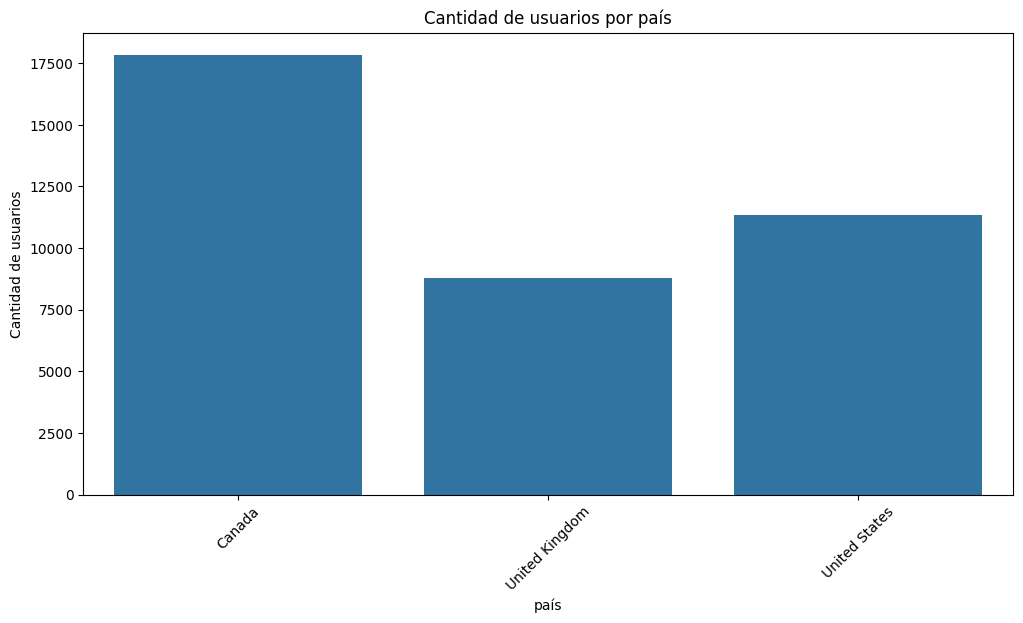

In [15]:
# querys para visualizar los datos de las tablas cargadas
query = "SELECT * FROM users;"
df = pd.read_sql(query, conexion_bd)
print(df.head())

usuario_pais= df.groupby('country')['id'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=usuario_pais, x='country', y='id')

plt.xticks(rotation=45)
plt.xlabel("país")
plt.ylabel("Cantidad de usuarios")
plt.title("Cantidad de usuarios por país")
plt.show()

** Ejercicio 5 <br>

** Dos variables categóricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

** Ejercicio 6 <br>

** Tres variables.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

** Ejercicio 7 <br>

** Graficar un Pairplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

## Nivel 2
***
** Ejercicio 1 <br>

** Correlación de todas las variables numéricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


** Ejercicio 2 <br>

** Implementa un jointplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

## Nivel 3
***
** Ejercicio 1 <br>

** Implementa un violinplot combinado con otro tipo de gráfico.



** Explicación del código: <br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

** Ejercicio 2 <br>

** Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

In [ ]:
# cierro la BD
if conexion_bd.is_connected():
        cursor.close()
        conexion_bd.close()
        print("MySQL connection is closed")

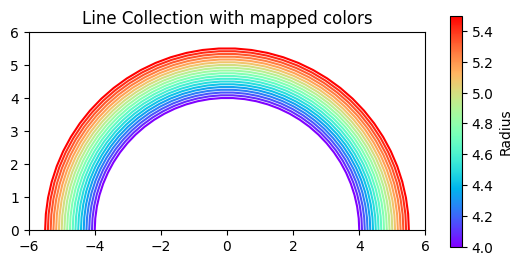

In [ ]:
from matplotlib.collections import LineCollection

num_arcs = 19
theta = np.linspace(0, np.pi, 36)
radii = np.linspace(4, 5.5, num=num_arcs)
arcs = [np.column_stack([r * np.cos(theta), r * np.sin(theta)]) for r in radii]

fig, ax = plt.subplots(figsize=(6.4, 3))
# set axes limits manually because Collections do not take part in autoscaling
ax.set_xlim(-6, 6)
ax.set_ylim(0, 6)
ax.set_aspect("equal")  # to make the arcs look circular

# create a LineCollection with the half-circles and color mapping
line_collection = LineCollection(arcs, array=radii, cmap="rainbow")
ax.add_collection(line_collection)

fig.colorbar(line_collection, label="Radius")
ax.set_title("Line Collection with mapped colors")

plt.show()

                                     id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3  0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4  06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   

            timestamp  amount  declined    product_ids  user_id      lat  \
0 2021-08-28 23:42:24  466.92         0      71, 1, 19       92  81.9185   
1 2021-07-26 07:29:18   49.53         0     47, 97, 43      170 -43.9695   
2 2022-01-06 21:25:27   92.61         0  47, 67, 31, 5      275 -81.2227   
3 2022-01-26 02:07:14  394.18         0     89, 83, 79      265 -34.3593   
4 2021-10-26 23:00:01  279.93         0         43, 31       92  33.7381   

   longitude  
0   -12.5276  
1  -117.5250  
2  -129.0500  
3  -100.5560  
4   158.2980  


C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\17115837.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


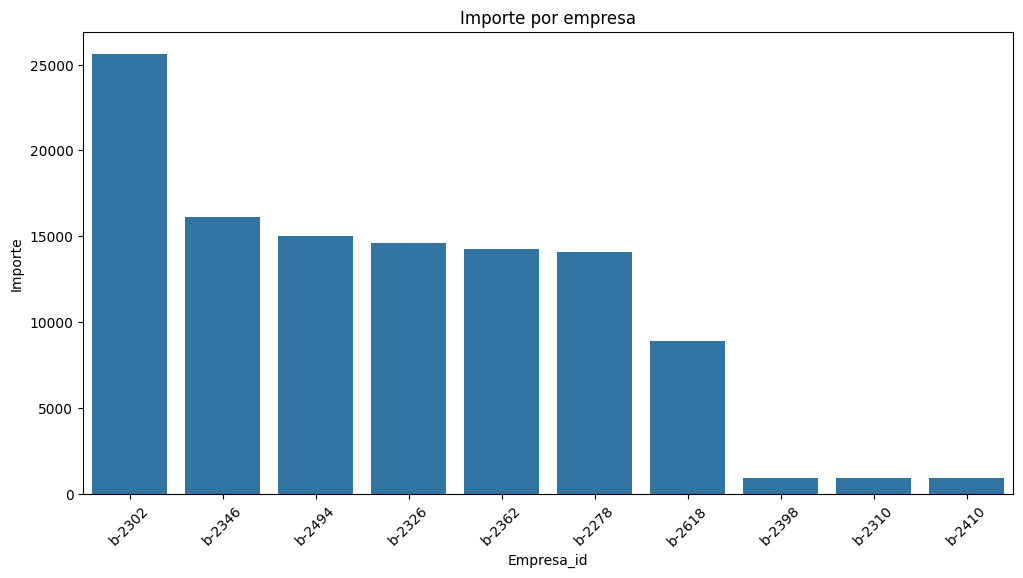

In [17]:
# querys para visualizar los datos de las tablas cargadas
query = "SELECT * FROM transactions;"
df = pd.read_sql(query, conexion_bd)
print(df.head())

importe_empresa_id= df.groupby('business_id')['amount'].sum().reset_index()
top_n=10
df_top=importe_empresa_id.nlargest(top_n,'amount')

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='business_id', y='amount')

plt.xticks(rotation=45)
plt.xlabel("Empresa_id")
plt.ylabel("Importe")
plt.title("Importe por empresa")
plt.show()

                                     id   card_id business_id  \
0  108B1D1D-5B23-A76C-55EF-C568E49A05DD  CcU-2938      b-2222   
1  EA2C3281-C9C1-A387-44F8-729FB4B51C76  CcU-2938      b-2222   
2  7DC26247-20EC-53FE-E555-B6C2E55CA5D5  CcU-2945      b-2226   
3  FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  CcU-2945      b-2226   
4  72997E96-DC2C-A4D7-7C24-66C302F8AE5A  CcU-2952      b-2230   

            timestamp  amount  declined     product_ids  user_id      lat  \
0 2021-07-07 17:43:16  293.57         0              59      275  83.7839   
1 2021-05-09 10:25:08  119.36         1  59, 79, 37, 73      275  20.2004   
2 2022-02-04 15:52:56  312.50         0          71, 41      275  58.9367   
3 2021-06-15 00:26:29  480.13         1               3      275 -21.8805   
4 2022-01-30 15:16:36  239.87         0       97, 41, 3      275  43.3584   

   longitude company_id               company_name           phone  \
0  -178.8600     b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
1  -11

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\3442046912.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


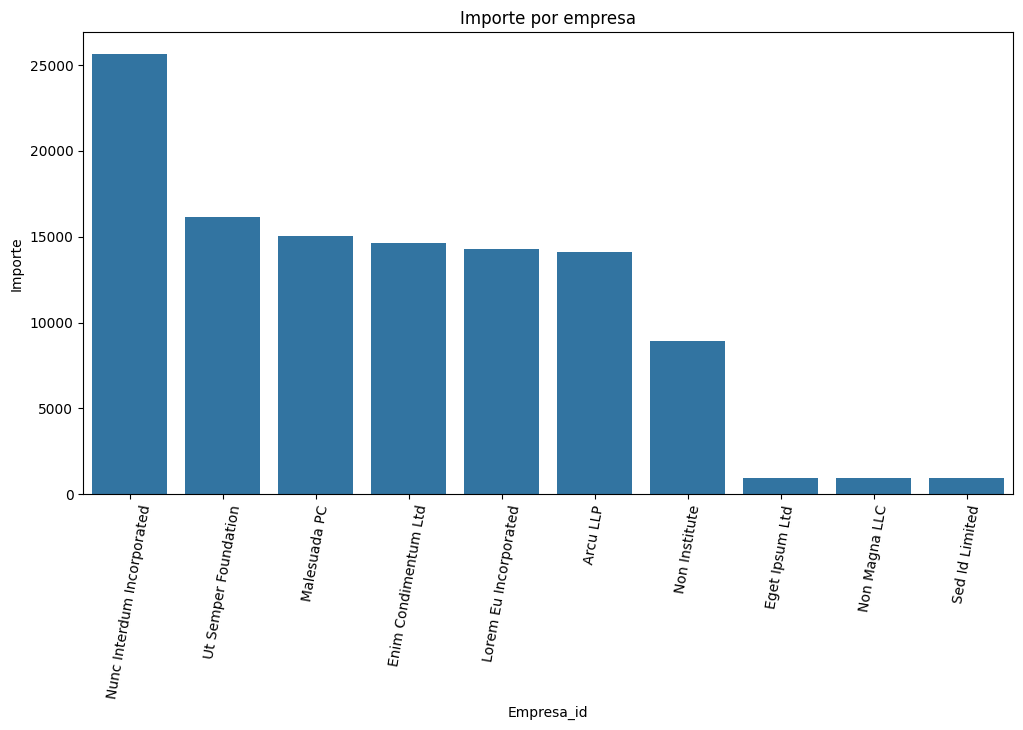

In [18]:
# querys para visualizar los datos de las tablas cargadas
query = "SELECT * FROM transactions JOIN companies ON company_id = business_id;"

df = pd.read_sql(query, conexion_bd)
print(df.head())

importe_empresa_id= df.groupby('company_name')['amount'].sum().reset_index()
top_n=10
df_top=importe_empresa_id.nlargest(top_n,'amount')

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='company_name', y='amount')

plt.xticks(rotation=80)
plt.xlabel("Empresa_id")
plt.ylabel("Importe")
plt.title("Importe por empresa")
plt.show()

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\1831035798.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


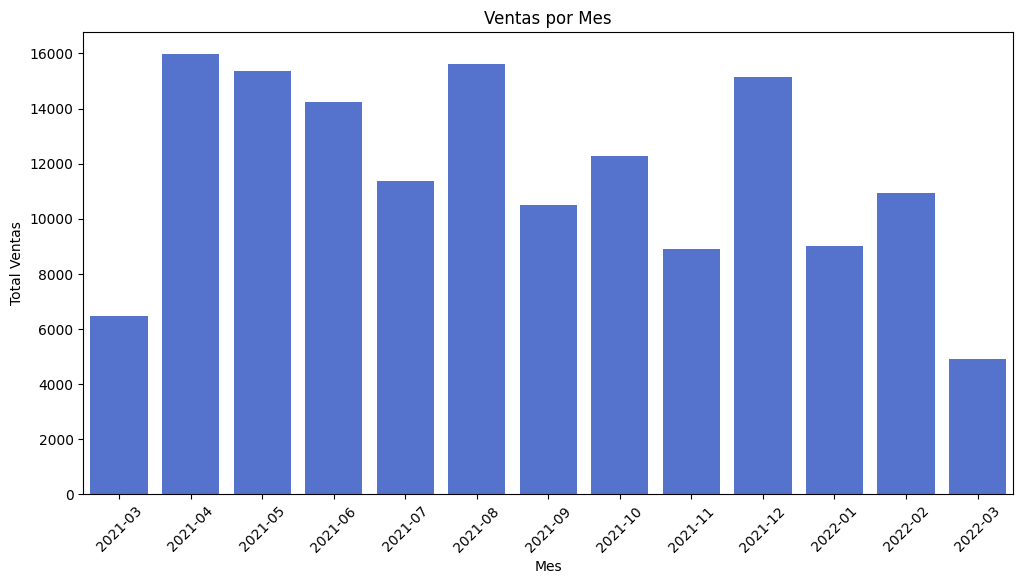

In [25]:
query = "SELECT * FROM transactions;"
df = pd.read_sql(query, conexion_bd)


df['timestamp'] = pd.to_datetime(df['timestamp']) #cambiar formato de fecha 
df['year_month'] = df['timestamp'].dt.to_period('M') #extraer año y mes
df_monthly = df.groupby('year_month')['amount'].sum().reset_index() # agrupo la suma del amount por mes 

df_monthly['year_month'] = df_monthly['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_monthly, x='year_month', y='amount', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Total Ventas")
plt.title("Ventas por Mes")
plt.show()

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\130331707.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


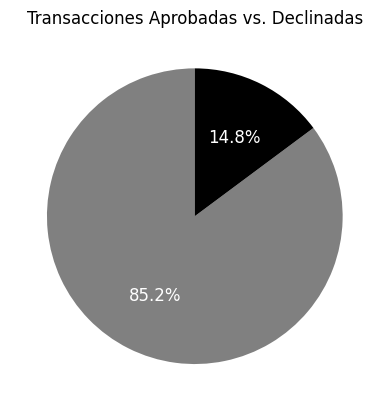

In [44]:
query = "SELECT declined FROM transactions;"
df = pd.read_sql(query, conexion_bd)

df_declined_counts = df['declined'].map({1: 'Declinadas', 0: 'Aprobadas'}).value_counts()
labels = df_declined_counts.index
colors = ['grey', 'black']

plt.pie(
    df_declined_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12} 
)
plt.title("Transacciones Aprobadas vs. Declinadas")
plt.show()